In [1]:
from randomOneMax import RandomOneMax
from fitness import Fitness
import random
# plt
import matplotlib.pyplot as plt

TAILLE_VECTEUR = 1000
TAILLE_POPULATION = 20
MAX_ITER = 20000

def replace_random(population, individual, population_size=TAILLE_POPULATION):
    population[random.randint(0, population_size - 1)] = individual

def initialisationRandom(npop):
    population = []
    for i in range(npop):
        population.append(RandomOneMax(TAILLE_VECTEUR).getVector())
    return population

def selection2Best(population):
    population.sort(key=lambda x: Fitness(x).getFitness(), reverse=True)
    return population[:2]

def crossover(parent1, parent2):
    crossPoint = random.randint(0, TAILLE_VECTEUR - 1)
    child1 = parent1[:crossPoint] + parent2[crossPoint:]
    child2 = parent2[:crossPoint] + parent1[crossPoint:]
    return child1, child2

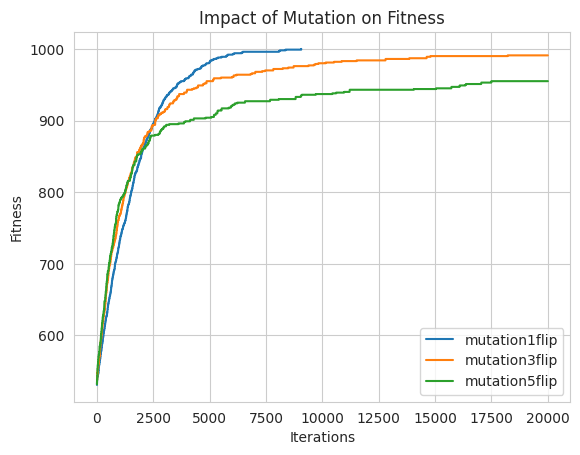

In [2]:

def mutation1flip(individual):
    mutationPoint = random.randint(0, TAILLE_VECTEUR - 1)
    if individual[mutationPoint] == 0:
        individual[mutationPoint] = 1
    else:
        individual[mutationPoint] = 0
    return individual

def mutation3flip(individual):
    for i in range(3):
        mutation1flip(individual)

def mutation5flip(individual):
    for i in range(5):
        mutation1flip(individual)

def evolution_with_mutation_test(mutation_type):
    population = initialisationRandom(TAILLE_POPULATION)
    i = 0
    fitness_history = []

    while i < MAX_ITER and Fitness(selection2Best(population)[0]).getFitness() < TAILLE_VECTEUR:
        parents = selection2Best(population)
        children = crossover(parents[0], parents[1])

        # Appliquer la mutation choisie
        for pop in population:
            if random.random() < 0.1:
                mutation_type(pop)

        for j in range(2):
            replace_random(population, children[j])
        i += 1
        fitness_history.append([i, Fitness(selection2Best(population)[0]).getFitness()])

    return fitness_history

for mutation_fn in [mutation1flip, mutation3flip, mutation5flip]:
        history = evolution_with_mutation_test(mutation_fn)
        x = [i[0] for i in history]
        y = [i[1] for i in history]
        plt.plot(x, y, label=mutation_fn.__name__)
plt.xlabel('Iterations')
plt.ylabel('Fitness') 
plt.title('Impact of Mutation on Fitness')
plt.legend()
plt.show()

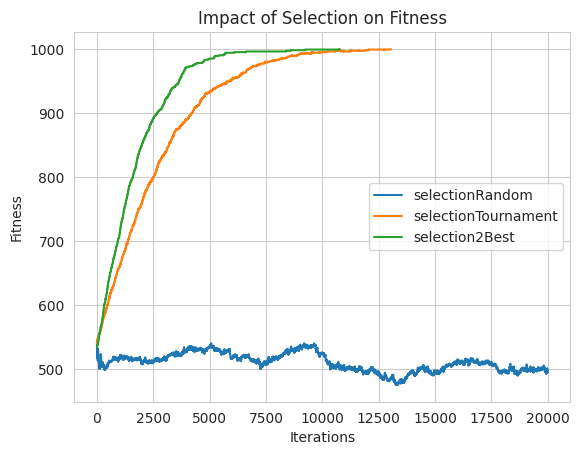

In [3]:
def selectionRandom(population):
    return random.sample(population, 2)

def selectionTournament(population):
    tournament = random.sample(population, 5)
    tournament.sort(key=lambda x: Fitness(x).getFitness(), reverse=True)
    return tournament[:2]

def evolution_with_selection_test(selection_type):
    population = initialisationRandom(TAILLE_POPULATION)
    i = 0
    fitness_history = []

    while i < MAX_ITER and Fitness(selection2Best(population)[0]).getFitness() < TAILLE_VECTEUR:
        parents = selection_type(population)
        children = crossover(parents[0], parents[1])

        # Appliquer la mutation choisie
        for pop in population:
            if random.random() < 0.1:
                mutation1flip(pop)

        for j in range(2):
            replace_random(population, children[j])
        i += 1
        fitness_history.append([i, Fitness(selection2Best(population)[0]).getFitness()])

    return fitness_history

for selection_fn in [selectionRandom, selectionTournament, selection2Best]:
    history = evolution_with_selection_test(selection_fn)
    x = [i[0] for i in history]
    y = [i[1] for i in history]
    plt.plot(x, y, label=selection_fn.__name__)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Impact of Selection on Fitness')
plt.legend()
plt.show()

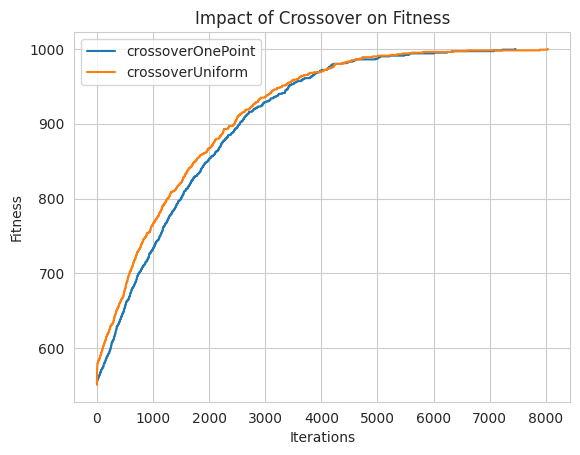

In [4]:
def crossoverUniform(parent1, parent2):
    child1 = []
    child2 = []
    for i in range(TAILLE_VECTEUR):
        if random.random() < 0.5:
            child1.append(parent1[i])
            child2.append(parent2[i])
        else:
            child1.append(parent2[i])
            child2.append(parent1[i])
    return child1, child2

def crossoverOnePoint(parent1, parent2):
    crossPoint = random.randint(0, TAILLE_VECTEUR - 1)
    child1 = parent1[:crossPoint] + parent2[crossPoint:]
    child2 = parent2[:crossPoint] + parent1[crossPoint:]
    return child1, child2

def evolution_with_crossover_test(crossover_type):
    population = initialisationRandom(TAILLE_VECTEUR)
    i = 0
    fitness_history = []

    while i < MAX_ITER and Fitness(selection2Best(population)[0]).getFitness() < TAILLE_VECTEUR:
        parents = selection2Best(population)
        children = crossover_type(parents[0], parents[1])

        # Appliquer la mutation choisie
        for pop in population:
            if random.random() < 0.1:
                mutation1flip(pop)

        for j in range(2):
            replace_random(population, children[j])
        i += 1
        # sort population by fitness
        population.sort(key=lambda x: Fitness(x).getFitness(), reverse=True)
        fitness_history.append([i, Fitness(selection2Best(population)[0]).getFitness()])

    return fitness_history

for crossover_fn in [crossoverOnePoint, crossoverUniform]:
    history = evolution_with_crossover_test(crossover_fn)
    x = [i[0] for i in history]
    y = [i[1] for i in history]
    plt.plot(x, y, label=crossover_fn.__name__)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Impact of Crossover on Fitness')
plt.legend()
plt.show()

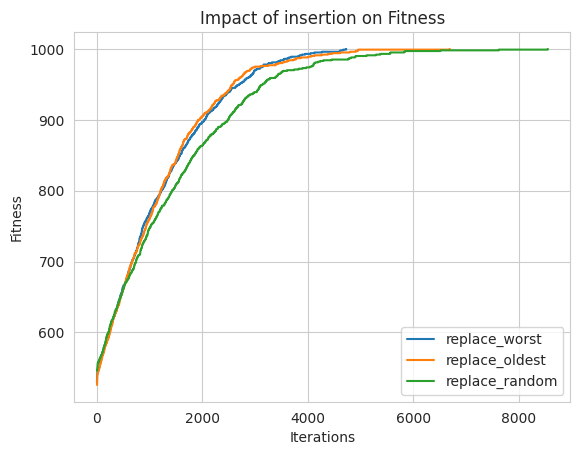

In [5]:
def replace_worst(population, individual):
    # Remplace l'individu avec la pire fitness
    population.sort(key=lambda x: Fitness(x[0]).getFitness())
    population[0] = individual

def replace_oldest(population, individual):
    # Remplace l'individu le plus ancien
    population.sort(key=lambda x: x[1])  # Trier par âge
    population[0] = individual

def evolution_with_insertion_test(replace_type):
    # Initialiser la population avec des âges
    population = [(individual, 0) for individual in initialisationRandom(TAILLE_POPULATION)]
    i = 0
    fitness_history = []

    while i < MAX_ITER and Fitness(selection2Best([ind for ind, age in population])[0]).getFitness() < TAILLE_VECTEUR:
        # Sélectionner les parents
        parents = selection2Best([ind for ind, age in population])
        children = crossoverUniform(parents[0], parents[1])

        # Assigner l'âge actuel aux enfants
        children = [(child, i) for child in children]

        # Appliquer la mutation sur toute la population avec probabilité 0.1
        population = [
            (mutation1flip(ind) if random.random() < 0.1 else ind, i if random.random() < 0.1 else age)
            for ind, age in population
        ]

        # Remplacer les individus dans la population
        for child in children:
            replace_type(population, child)

        # Calculer la fitness du meilleur individu
        best_fitness = Fitness(selection2Best([ind for ind, age in population])[0]).getFitness()
        fitness_history.append([i, best_fitness])
        i += 1

    return fitness_history

# Tester avec différents types de remplacement
for replace_fn in [replace_worst, replace_oldest, replace_random]:
    history = evolution_with_insertion_test(replace_fn)
    x = [i[0] for i in history]
    y = [i[1] for i in history]
    plt.plot(x, y, label=replace_fn.__name__)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Impact of insertion on Fitness')
plt.legend()
plt.show()


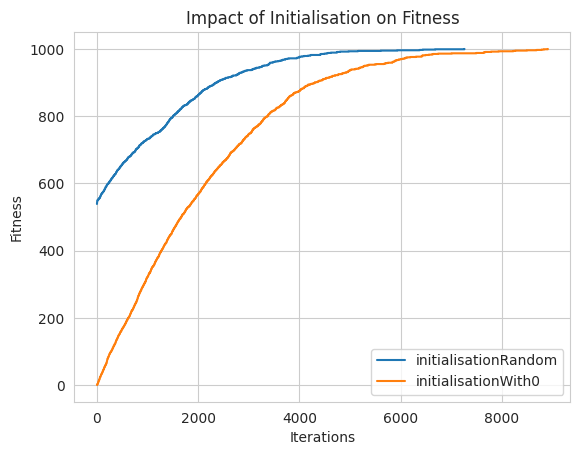

In [6]:
def initialisationWith0(npop):
    population = []
    for i in range(npop):
        individual = [0 for i in range(TAILLE_VECTEUR)]
        population.append(individual)
    return population

def evolution_with_initialisation_test(initialisation_type):
    population = initialisation_type(TAILLE_POPULATION)
    i = 0
    fitness_history = []

    while i < MAX_ITER and Fitness(selection2Best(population)[0]).getFitness() < TAILLE_VECTEUR:
        parents = selection2Best(population)
        children = crossoverUniform(parents[0], parents[1])

        # Appliquer la mutation choisie
        for pop in population:
            if random.random() < 0.1:
                mutation1flip(pop)

        for j in range(2):
            replace_random(population, children[j])
        i += 1
        fitness_history.append([i, Fitness(selection2Best(population)[0]).getFitness()])

    return fitness_history

for initialisation_fn in [initialisationRandom, initialisationWith0]:
    history = evolution_with_initialisation_test(initialisation_fn)
    x = [i[0] for i in history]
    y = [i[1] for i in history]
    plt.plot(x, y, label=initialisation_fn.__name__)
    
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Impact of Initialisation on Fitness')
plt.legend()
plt.show()

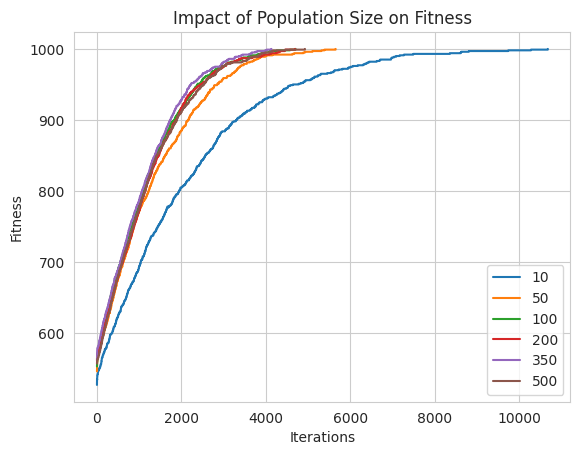

In [7]:
# test en faisan varier la taille de la population
def evolution_with_population_size_test(population_size):
    population = initialisationRandom(population_size)
    i = 0
    fitness_history = []

    while i < MAX_ITER and Fitness(selection2Best(population)[0]).getFitness() < TAILLE_VECTEUR:
        parents = selection2Best(population)
        children = crossoverUniform(parents[0], parents[1])

        # Appliquer la mutation choisie
        for pop in population:
            if random.random() < 0.1:
                mutation1flip(pop)

        for j in range(2):
            replace_random(population, children[j], population_size=population_size)
        i += 1
        fitness_history.append([i, Fitness(selection2Best(population)[0]).getFitness()])

    return fitness_history

for population_size in [10, 50, 100, 200, 350, 500]:
    history = evolution_with_population_size_test(population_size)
    x = [i[0] for i in history]
    y = [i[1] for i in history]
    plt.plot(x, y, label=population_size)
    
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Impact of Population Size on Fitness')
plt.legend()
plt.show()

=== Run 1/10 ===
=== Run 2/10 ===
=== Run 3/10 ===
=== Run 4/10 ===
=== Run 5/10 ===
=== Run 6/10 ===
=== Run 7/10 ===
=== Run 8/10 ===
=== Run 9/10 ===
=== Run 10/10 ===


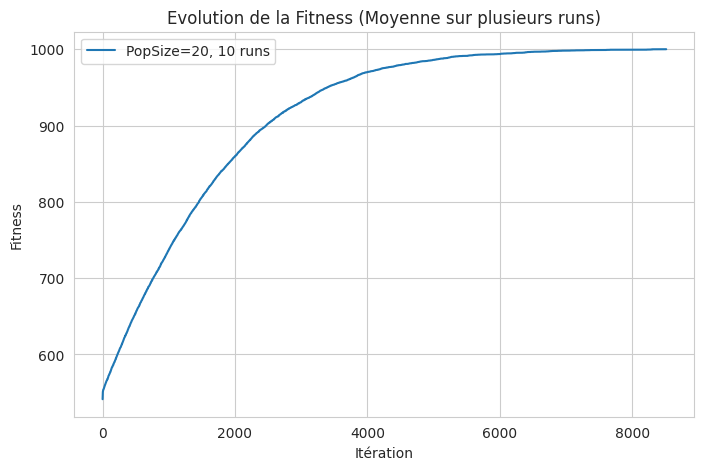

Les résultats ont été sauvegardés dans : csv/basic_ag.csv


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def run_multiple_basic_ag(pop_size=20, n_runs=10, csv_folder="csv", csv_filename="basic_ag.csv"):
    """
    1) Exécute l'algorithme 'evolution_with_population_size_test' n_runs fois
       avec une population = pop_size.
    2) Aligne les historiques de fitness (si des runs sont plus courts),
       en répétant la dernière fitness pour le restant des itérations.
    3) Calcule la moyenne de la fitness à chaque itération.
    4) Trace la courbe moyenne de fitness.
    5) Sauvegarde le résultat dans un CSV <csv_folder>/<csv_filename>.
    """

    all_histories = []

    # --- 1) Lancement de n_runs fois l'algo ---
    for run_id in range(n_runs):
        print(f"=== Run {run_id+1}/{n_runs} ===")
        history = evolution_with_population_size_test(pop_size)
        all_histories.append(history)

    # --- 2) Alignement des historiques ---
    # On trouve la longueur max (itération max) atteinte par au moins un run
    max_length = max(len(h) for h in all_histories)

    # On va construire un tableau NumPy de shape (n_runs, max_length)
    # où l'on place la fitness de chaque run. 
    # Si un run s'arrête avant max_length, on répète sa dernière fitness.
    fitness_array = np.zeros((n_runs, max_length))

    for r, hist in enumerate(all_histories):
        # hist est une liste de paires (iteration, fitness)
        if not hist:
            continue
        last_fitness = hist[-1][1]  # fitness de la dernière itération du run r
        for i, (iter_num, fit) in enumerate(hist):
            fitness_array[r, i] = fit
        # On remplit la fin si nécessaire
        for i2 in range(len(hist), max_length):
            fitness_array[r, i2] = last_fitness

    # Les itérations seront 1..max_length
    iterations = list(range(1, max_length + 1))

    # --- 3) Calcul de la moyenne sur les runs (axe=0) ---
    avg_fitness = np.mean(fitness_array, axis=0)

    # --- 4) Trace la courbe moyenne ---
    plt.figure(figsize=(8, 5))
    plt.plot(iterations, avg_fitness, label=f"PopSize={pop_size}, {n_runs} runs")
    plt.xlabel("Itération")
    plt.ylabel("Fitness")
    plt.title("Evolution de la Fitness (Moyenne sur plusieurs runs)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 5) Sauvegarde dans un CSV ---
    # On construit un DataFrame avec 2 colonnes : iteration, fitness
    df = pd.DataFrame({"iteration": iterations, "fitness": avg_fitness})

    # Créer le dossier s'il n'existe pas
    if not os.path.exists(csv_folder):
        os.makedirs(csv_folder)

    filepath = os.path.join(csv_folder, csv_filename)
    df.to_csv(filepath, index=False)
    print(f"Les résultats ont été sauvegardés dans : {filepath}")

if __name__ == "__main__":
    run_multiple_basic_ag(
        pop_size=20,   
        
        n_runs=10,         # Nombre de runs
        csv_folder="csv",  # Dossier de sortie
        csv_filename="basic_ag.csv"
    )
